# ICS5110 - Gradient Boosting Implementation

In [ ]:
# ONLY USED IN COLAB

#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


## Importing packages

In [ ]:
import pandas as pd
import numpy as np
import numpy
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.impute import SimpleImputer
import shap

## Loading the cleaned dataset

In [ ]:
df = pd.read_csv('cleaned_dataset.csv')
df.head()

,id,source_name,title,author_name,publish_date,accident_date,content,tags,day_of_the_week,time,...,senior_driver_involved,child_involved,senior_involved,visibility,wind_speed,temperature,severity,ambulance_called,additional_source_name,additional_url
0,1.0,police,Collision between a car and a motorbike in Żur...,NaN,09/10/2025,09/10/2025,"Today, at around 0930hrs, the Police were info...",{},Thursday,morning,...,1.0,0.0,1.0,10.0,3.7,23.0,high,1.0,Weatherspark,https://weatherspark.com
1,2.0,police,Car-motorcycle traffic accident,NaN,19/06/2025,18/06/2025,"Yesterday, at around 1830hrs, the Police were ...",{},Wednesday,evening,...,1.0,0.0,1.0,10.0,11.1,26.0,high,1.0,NaN,NaN
2,3.0,police,Car-motorcycle collision in Ħal Qormi,NaN,12/05/2025,12/05/2025,"Today, at around 0800hrs, the Police were info...",{},Monday,morning,...,0.0,0.0,0.0,10.0,27.8,20.0,high,1.0,NaN,NaN
3,4.0,police,Collision between motorcycle and car in Għaxaq,NaN,30/07/2025,29/07/2025,"Yesterday, at around 1800hrs, the Police were ...",{},Tuesday,evening,...,0.0,0.0,0.0,10.0,38.9,26.0,high,1.0,NaN,NaN
4,5.0,police,Car-motorcycle collision,NaN,07/04/2025,06/04/2025,"Yesterday, at around quarter to nine in the ev...",{},Sunday,evening,...,0.0,0.0,0.0,10.0,18.5,15.0,high,1.0,NaN,NaN


In [ ]:
df["severity"] = df["severity"].str.lower().str.strip()
df["vehicle_involved"] = df["vehicle_involved"].str.lower().str.strip()

#Binary Encoding the severity
df["fatal"] = df["severity"].apply(
    lambda x: 1 if x in ["fatal"] else 0
)

df.head()

,id,source_name,title,author_name,publish_date,accident_date,content,tags,day_of_the_week,time,...,child_involved,senior_involved,visibility,wind_speed,temperature,severity,ambulance_called,additional_source_name,additional_url,fatal
0,1.0,police,Collision between a car and a motorbike in Żur...,NaN,09/10/2025,09/10/2025,"Today, at around 0930hrs, the Police were info...",{},Thursday,morning,...,0.0,1.0,10.0,3.7,23.0,high,1.0,Weatherspark,https://weatherspark.com,0
1,2.0,police,Car-motorcycle traffic accident,NaN,19/06/2025,18/06/2025,"Yesterday, at around 1830hrs, the Police were ...",{},Wednesday,evening,...,0.0,1.0,10.0,11.1,26.0,high,1.0,NaN,NaN,0
2,3.0,police,Car-motorcycle collision in Ħal Qormi,NaN,12/05/2025,12/05/2025,"Today, at around 0800hrs, the Police were info...",{},Monday,morning,...,0.0,0.0,10.0,27.8,20.0,high,1.0,NaN,NaN,0
3,4.0,police,Collision between motorcycle and car in Għaxaq,NaN,30/07/2025,29/07/2025,"Yesterday, at around 1800hrs, the Police were ...",{},Tuesday,evening,...,0.0,0.0,10.0,38.9,26.0,high,1.0,NaN,NaN,0
4,5.0,police,Car-motorcycle collision,NaN,07/04/2025,06/04/2025,"Yesterday, at around quarter to nine in the ev...",{},Sunday,evening,...,0.0,0.0,10.0,18.5,15.0,high,1.0,NaN,NaN,0


In [ ]:
# RQ1: What underlying factors increase the likelihood of severe road traffic accidents?

features = [
    "vehicle_involved",
    "vehicle_count",
    "road_type",
#    "locality",
    "min_age",
    "max_age",
    "young_driver_involved",
    "adult_driver_involved",
    "senior_driver_involved",
    "child_involved",
    "visibility",
    "wind_speed",
    "temperature",
    "time_in_hours",
    "rush_hour",
    "weekend_weekday"
]

X = df[features]
y = df["fatal"]

In [ ]:
# RQ2: Do senior drivers (>60) and certain locations show higher risk (fatality) at certain road types (junctions, roundabouts) ?

features = [
    "senior_driver_involved",
    #"locality",
    "road_type"
]

X = df[features]
y = df["fatal"]

In [ ]:
# RQ3: Are fatal accidents more likely to be caused by single-vehicle or multi-vehicle collisions, and which specific vehicle combinations are most commonly involved in fatal crashes? (Part 1)

features = [
    "vehicle_involved",
]

X = df[features]
y = df["fatal"]

In [ ]:
# RQ3: Are fatal accidents more likely to be caused by single-vehicle or multi-vehicle collisions, and which specific vehicle combinations are most commonly involved in fatal crashes? (Part 2)

features = [
    "vehicle_count"
]

X = df[features]
y = df["fatal"]

In [ ]:
# RQ3: Are fatal accidents more likely to be caused by single-vehicle or multi-vehicle collisions, and which specific vehicle combinations are most commonly involved in fatal crashes? (combined)

features = [
    "vehicle_involved",
    "vehicle_count"
]

X = df[features]
y = df["fatal"]

In [ ]:
# Are certain times of day, days of the week, or rush-hour periods associated with a higher likelihood of accidents.

features = [
    "vehicle_involved",
    "vehicle_count",
    "road_type",
#    "locality",
    "min_age",
    "max_age",
    "young_driver_involved",
    "adult_driver_involved",
    "senior_driver_involved",
    "child_involved",
    "visibility",
    "wind_speed",
    "temperature",
    "time_in_hours",
    "rush_hour",
    "weekend_weekday"
]

X = df[features]
y = df["fatal"]

In [ ]:
# Identify types of data
#categorical = ["vehicle_involved", "road_type", "locality", "weekend_weekday"]
categorical_rq1 = ["vehicle_involved", "road_type", "weekend_weekday"]
categorical_rq2 = ["road_type", "locality"]
categorical_rq2_2 = ["road_type"]
categorical_rq3_1 = ["vehicle_involved"]

categorical_list = [categorical_rq1, categorical_rq2, categorical_rq2_2, categorical_rq3_1]
categorical = categorical_list[0]
numeric = [c for c in features if c not in categorical]

#One Hot encoding on categorigal features and scaling on numeric features
#fatal_high	fatal_med	fatal_low	fatal_fatal	fatal_no
#0	            1	        0	        0	        0
#0	            0	        0	        1	        0

#To encode oclumsn use column transformer, which has 2 items, transform categorical features and numerical features using one hot encoding and scaling
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", Pipeline([
            ("impute", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"))
        ]), categorical),

        ("num", Pipeline([
            ("impute", SimpleImputer(strategy="median")),
            ("scale", StandardScaler())
        ]), numeric)
    ]
)

## Model Creation

In [ ]:
# TO TRY OUT: gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
#gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
gb_model = GradientBoostingClassifier()

### Hyperparameter tuning with Grid Search and Cross-Validation

In [ ]:
param_grid = {
    'n_estimators': [10, 25, 50, 100],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [None] + [i for i in range(1, 15)],
    'min_samples_split': [2, 5, 10],
    'subsample': [0.5, 0.7, 0.8, 1.0],
    #'min_samples_leaf': [1, 2, 4],
    #'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='accuracy')

### Building model

In [ ]:
# Building the pipeline for the model (preprocessing and gradient boosting model)

model = ImbPipeline(steps=[
    ("preprocess", preprocessor),
    ("smote", SMOTE(random_state=42)), #used to balacnce samples when data is imbalanced
    ("gradboost", grid_search) #("gradboost", gb_model)
])

In [ ]:
# Splitting the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [ ]:
# Training the finished model

model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['vehicle_involved',
                                                   'road_type',
                                                   'weekend_weekday']),
                                                 ('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  [...
                                                   'temperature',
                                                   'time_in_hours',
                                                   'rush_hour'])])),
                ('smote', SMOTE(random_state=42)),
                ('gradboost',
                 GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                              param_grid={'learning_rate': [0.1, 0.01, 0.001],
                                          'max_depth': [None, 1, 2, 3, 4, 5, 6,
                                                        7, 8, 9, 10, 11, 12, 13,
                                                        14],
                                          'min_samples_split': [2, 5, 10],
                                          'n_estimators': [10, 25, 50, 100],
                                          'subsample': [0.5, 0.7, 0.8, 1.0]},
                              scoring='accuracy'))])

In [ ]:
print("Best parameters found: ", model.named_steps["gradboost"].best_params_)
print("Best cross-validation score: ", model.named_steps["gradboost"].best_score_)

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 11, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.5}
Best cross-validation score:  0.9557506584723441


In [ ]:
import pickle

# Saving the tuned model for future reference
with open('grad_boost_model_full.pkl', 'wb') as file:
    pickle.dump(model, file)

## Model Testing & Evaluation

In [ ]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

print(y_pred)

cm = confusion_matrix(y_test, y_pred)

#print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
#print(f'Precision: {precision_score(y_test, y_pred)}')
#print(f'Recall: {recall_score(y_test, y_pred)}')
#print(f'F1 Score: {f1_score(y_test, y_pred)}')

# Printing the classification report (featuring accuracy, precision, recall and F1-score)
print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred))

coef = model.named_steps["gradboost"].best_estimator_.feature_importances_
feature_names = model.named_steps["preprocess"].get_feature_names_out()

print(coef)

coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coef
}).sort_values("Coefficient", ascending=False)

vehicle_factors = coef_df[coef_df["Feature"].str.startswith("cat__vehicle_involved")]
print(vehicle_factors)

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        73
           1       1.00      0.33      0.50         9

    accuracy                           0.93        82
   macro avg       0.96      0.67      0.73        82
weighted avg       0.93      0.93      0.91        82

[1.48448051e-04 4.00881903e-06 6.19805483e-03 4.91463166e-13
 2.48165025e-02 1.16503242e-05 1.58490479e-06 6.92439082e-02
 1.66973342e-02 2.50415594e-04 3.31992488e-02 1.18135554e-08
 3.08973162e-02 7.06656943e-04 4.49467181e-04 2.63768256e-02
 8.63633914e-03 8.57472747e-03 1.39718363e-05 2.58596875e-03
 2.55714280e-04 1.28960481e-06 2.46015446e-05 1.31629901e-02
 2.29115958e-09 4.37212654e-07 1.56928998e-03 1.19142450e-01
 3.65575197e-02 3.55779816e-03 3.49891994e-02 2.69562024e-02
 4.76376790e-02 9

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


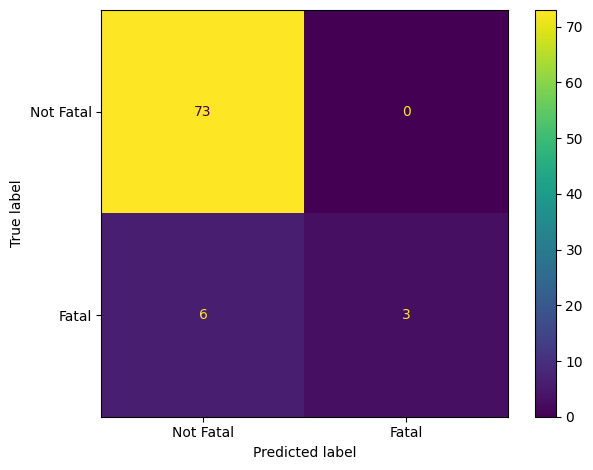

In [ ]:
# Displaying the confusion matrix from the results

labels = ['Not Fatal', 'Fatal']

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
cm_display.plot()  # Optional: add color for better visualization
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Transform test data
X_test_transformed = model.named_steps["preprocess"].transform(X_test)

# Optional: densify if OneHotEncoder produced sparse output
if hasattr(X_test_transformed, "toarray"):
    X_test_transformed = X_test_transformed.toarray()

gradboost_model = model.named_steps["gradboost"].best_estimator_
explainer = shap.TreeExplainer(gradboost_model)
shap_values = explainer.shap_values(X_test_transformed)

shap_df = pd.DataFrame(
    np.abs(shap_values).mean(axis=0),
    index=feature_names,
    columns=["Mean |SHAP|"]
).sort_values("Mean |SHAP|", ascending=False)

print(shap_df.head(10))

                                      Mean |SHAP|
cat__road_type_main road                 1.567390
num__temperature                         1.518276
num__max_age                             0.992659
cat__vehicle_involved_car-motorcycle     0.938817
num__time_in_hours                       0.832256
cat__vehicle_involved_car-car            0.687870
num__adult_driver_involved               0.673592
num__wind_speed                          0.461697
cat__road_type_residential               0.455148
num__min_age                             0.425107


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


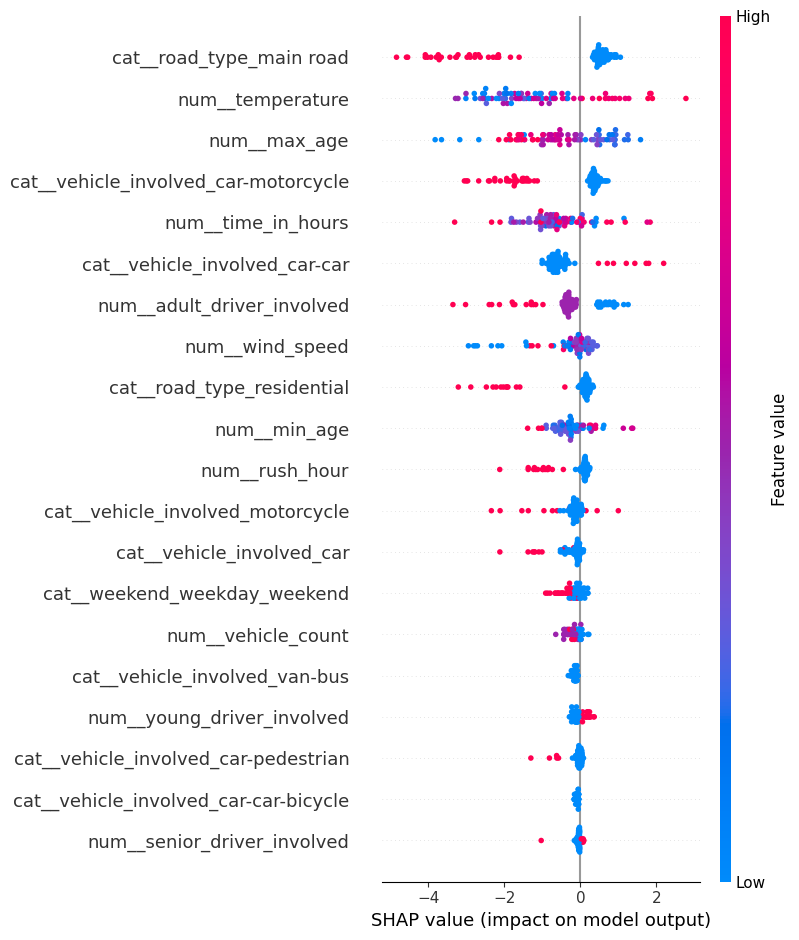

In [ ]:
shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names)

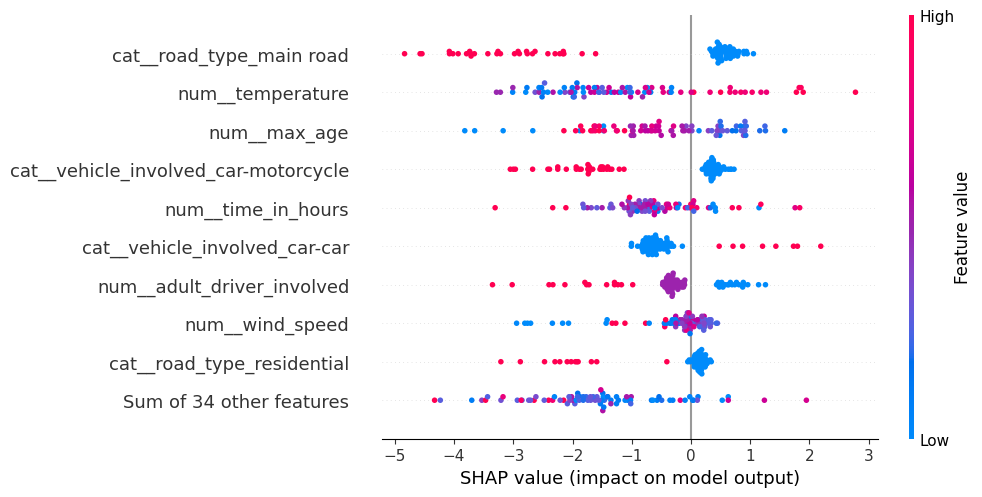

In [ ]:
# Convert the processed data back to a DataFrame
X_test_df = pd.DataFrame(X_test_transformed, columns=feature_names)

# Now SHAP will automatically label the Y-axis correctly
shap_values_names = explainer(X_test_df)
shap.plots.beeswarm(shap_values_names)

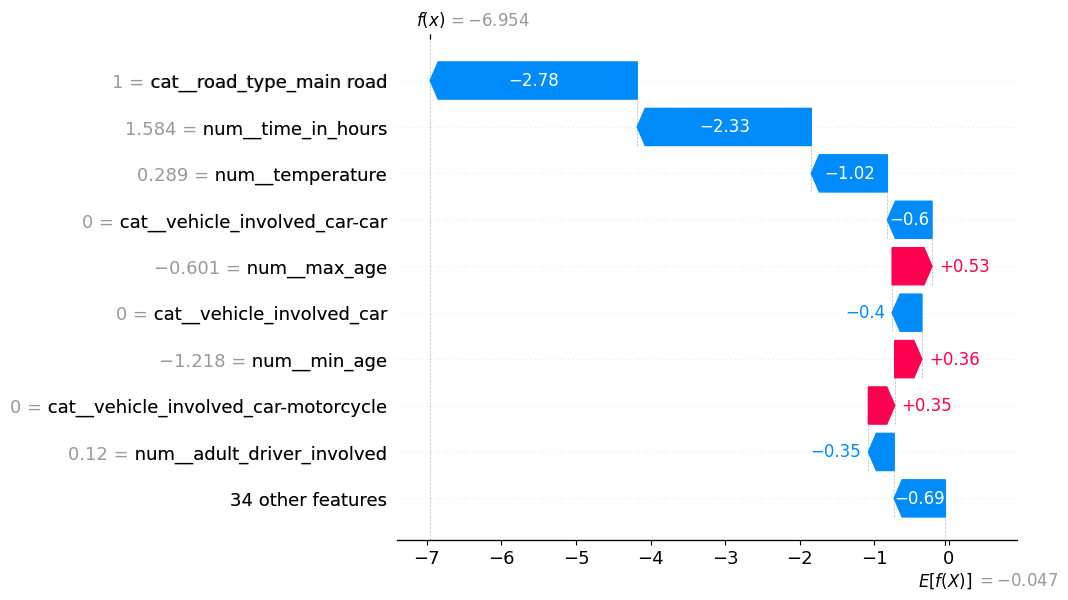

In [ ]:
shap.plots.waterfall(shap_values_names[28])

In [ ]:
shap_values[38]

array([ 4.65143304e-03,  4.82816181e-04, -5.23349358e-02,  3.65385305e-09,
       -1.60352659e-02,  5.18443732e-04, -9.97313927e-06, -7.77007561e-01,
       -6.00908367e-02,  5.18620099e-04,  4.76896856e-01,  3.04443969e-07,
       -2.05675938e-02, -2.35300992e-01, -3.44253954e-03, -1.27398132e-01,
        1.09109219e-02,  4.17597411e-02,  2.13745153e-03,  3.13633780e-03,
       -4.33687623e-02,  2.42011023e-03,  6.18695494e-03, -2.73278169e-01,
        5.24228186e-07,  8.96398611e-05, -2.01336538e-02,  5.03803791e-01,
       -2.29618342e+00,  3.70887419e-03, -1.04902829e-01, -1.87566024e-01,
        7.95704387e-02,  4.57787567e-01, -1.01643992e-01, -3.02922293e-01,
       -5.62528331e-02,  1.36687321e-02,  5.45658956e-03, -2.58052649e-01,
       -3.01039569e+00, -2.25440790e-01,  1.18196278e-01])

In [ ]:
for i, name in enumerate(feature_names):
    print(f"Feature {i}: {name}")

Feature 0: cat__vehicle_involved_bus
Feature 1: cat__vehicle_involved_bus-motorcycle
Feature 2: cat__vehicle_involved_bus-pedestrian
Feature 3: cat__vehicle_involved_bus-truck
Feature 4: cat__vehicle_involved_car
Feature 5: cat__vehicle_involved_car-bicycle
Feature 6: cat__vehicle_involved_car-bus
Feature 7: cat__vehicle_involved_car-car
Feature 8: cat__vehicle_involved_car-car-bicycle
Feature 9: cat__vehicle_involved_car-car-car
Feature 10: cat__vehicle_involved_car-motorcycle
Feature 11: cat__vehicle_involved_car-motorcycle-truck
Feature 12: cat__vehicle_involved_car-pedestrian
Feature 13: cat__vehicle_involved_car-truck
Feature 14: cat__vehicle_involved_car-truck-bicycle
Feature 15: cat__vehicle_involved_motorcycle
Feature 16: cat__vehicle_involved_motorcycle-bicycle
Feature 17: cat__vehicle_involved_motorcycle-motorcycle
Feature 18: cat__vehicle_involved_motorcycle-pedestrian
Feature 19: cat__vehicle_involved_scooter-car
Feature 20: cat__vehicle_involved_truck
Feature 21: cat__vehi

In [ ]:
# Reviewing the actual and predicted values for each set of features
for i in range(len(X_test)): # Changed from len(X) to len(X_test)
    print(f"\nSample {i+1}")
    print(X_test.iloc[i].to_dict()) # Changed from X.iloc[i] to X_test.iloc[i]
    print("Prediction:", "Fatal" if y_pred[i] == 1 else "Not Fatal")
    print("Probabilities:", y_pred_proba[i])
    print("Actual:", "Fatal" if y_test.iloc[i] == 1 else "Not Fatal")
    #print("Probabilities:", y_test.iloc)


Sample 1
{'vehicle_involved': 'car', 'vehicle_count': 1.0, 'road_type': 'main road', 'min_age': 25.0, 'max_age': 28.0, 'young_driver_involved': 0.0, 'adult_driver_involved': 1.0, 'senior_driver_involved': 0.0, 'child_involved': 0.0, 'visibility': 10.0, 'wind_speed': 18.5, 'temperature': 14.0, 'time_in_hours': 1530, 'rush_hour': 0, 'weekend_weekday': 'weekday'}
Prediction: Not Fatal
Probabilities: [0.97936322 0.02063678]
Actual: Not Fatal

Sample 2
{'vehicle_involved': 'car-motorcycle', 'vehicle_count': 2.0, 'road_type': 'bypass', 'min_age': 33.0, 'max_age': 55.0, 'young_driver_involved': 0.0, 'adult_driver_involved': 2.0, 'senior_driver_involved': 0.0, 'child_involved': 0.0, 'visibility': 10.0, 'wind_speed': 14.8, 'temperature': 29.0, 'time_in_hours': 1515, 'rush_hour': 0, 'weekend_weekday': 'weekday'}
Prediction: Not Fatal
Probabilities: [9.99675557e-01 3.24443429e-04]
Actual: Not Fatal

Sample 3
{'vehicle_involved': 'motorcycle', 'vehicle_count': 1.0, 'road_type': 'main road', 'min_